# Extended Isolation Forest

Compare Extended Isolation Forest implementation by @sahandha (original paper) [1] with and H2O.AI implementation. The anomaly score mean and variance given by both algorithms is studied on various toy datasets. The same comparing method is presented in Extended Isolation Forest paper [2] for extension level study.

##### Result:
The outputs of both implementations are similar and can be considered as equals. The variance of @sahandha implementation is lower than H2O.AI, which could mean that the @sahandha implementation provides more accurate detection of the structure of a given dataset, especially on Datasets 6 and 7. The reason for the higher variance of H2O could be not rubust sub-sampling method inside of H2O implementation, and future focus will be on sub-sampling method tests.

In [1]:
import sys
sys.path.append("D:/skola/dip/h2o-3/h2o-py/build") # path to h2o build
sys.path.append("D:/skola/dip/eif") # path to eif_old.py file (git clone https://github.com/sahandha/eif.git)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import eif_old as iso
import h2o
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2OExtendedIsolationForestEstimator
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs, make_moons, make_circles, make_s_curve

versionFromGradle='3.27.0',projectVersion='3.27.0.99999',branch='PUBDEV-7138-extended-isolation-forest',lastCommitHash='73ce51955b21b740d61584082ad1e5d8c3d2b2e9',gitDescribe='jenkins-master-4841-90-g73ce51955b-dirty',compiledOn='2020-05-14 16:27:49',compiledBy='potte'


In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.
versionFromGradle='3.27.0',projectVersion='3.27.0.99999',branch='PUBDEV-7138-extended-isolation-forest',lastCommitHash='73ce51955b21b740d61584082ad1e5d8c3d2b2e9',gitDescribe='jenkins-master-4841-90-g73ce51955b-dirty',compiledOn='2020-05-14 16:27:49',compiledBy='potte'


H2O cluster uptime:,1 min 34 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,16 hours
H2O cluster name:,potte
H2O cluster total nodes:,1
H2O cluster free memory:,21.22 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [18]:
seed = 42
N = 500
ntrees = 100
sample_size = 356
extension_level = 1
granularity = 150

# Define datasets
blobs_params = dict(random_state=seed, n_samples=N, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=1, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],
    4. * (make_moons(n_samples=N, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])), 14. * (np.random.RandomState(seed).rand(N, 2) - 0.5),
    make_blobs(centers=[[2, 2], [-2, -2], [2, -2]], cluster_std=0.4, **blobs_params)[0],
    make_circles(n_samples=N, factor=.5, noise=.05)[0],
    make_s_curve(N, random_state=seed)[0],
]

datasets[7][:,1] = datasets[7][:,2]
datasets[7] = np.delete(datasets[7], [2], 1)

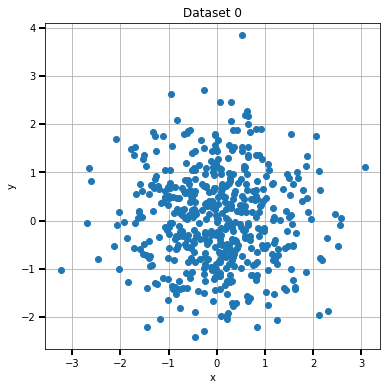

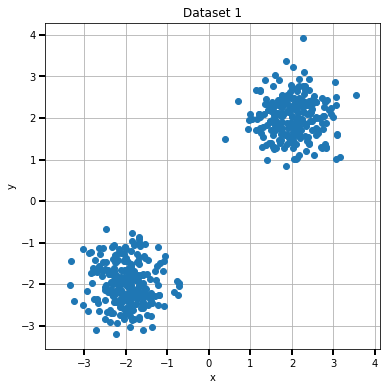

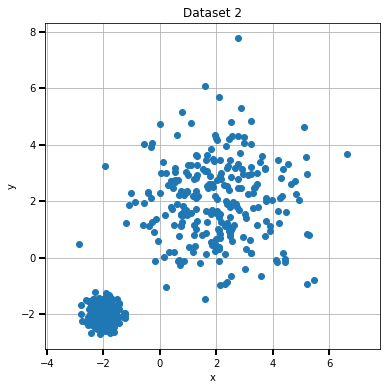

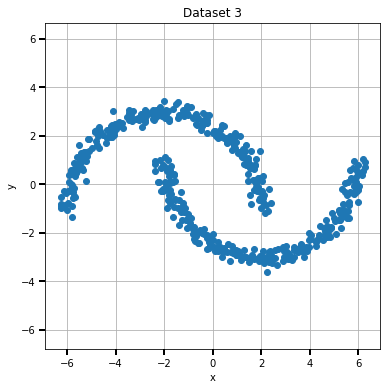

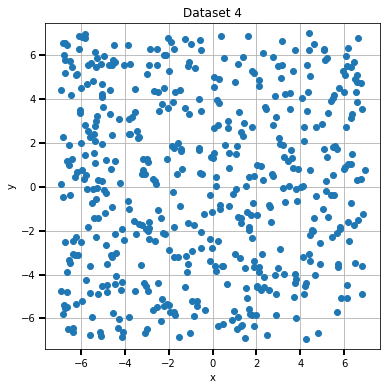

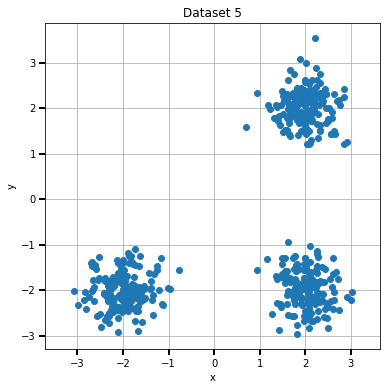

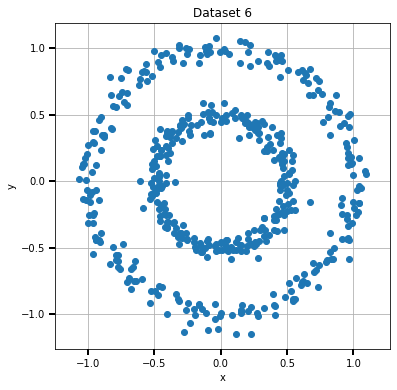

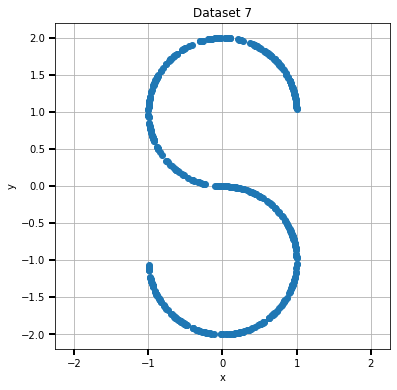

In [19]:
for i_dataset, X in enumerate(datasets):
    fig=plt.figure(figsize=(6,6))
    fig.add_subplot(111)
    plt.plot(X[:,0],X[:,1],'o')
    plt.grid("off")
    plt.axis("equal")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tick_params(direction='out', length=6, width=2)
    plt.title(f"Dataset {i_dataset}")
    plt.show()

In [20]:
h2o_frames = []
for i_dataset, X in enumerate(datasets):
    hf = h2o.H2OFrame(X,column_names = ["x", "y"])
    h2o_frames.append(hf)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
h2o_models = []
for i_h2o_frame, hf in enumerate(h2o_frames):
    EIF_h2o = H2OExtendedIsolationForestEstimator(model_id = f"extended_isolation_forest{i_h2o_frame}.hex",
                                     ntrees = ntrees, seed = seed,
                                                  sample_size = sample_size, extension_level = extension_level)
    EIF_h2o.train(training_frame = hf)
    h2o_models.append(EIF_h2o)

paper_models = []    
for i_dataset, X in enumerate(datasets):
    EIF_paper  = iso.iForest(X, ntrees = ntrees, sample_size = 256, ExtensionLevel=extension_level)
    paper_models.append(EIF_paper)
    print(f"Paper model {i_dataset + 1} is ready")
    

extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
Paper model 1 is ready
Paper model 2 is ready
Paper model 3 is ready
Paper model 4 is ready
Paper model 5 is ready
Paper model 6 is ready
Paper model 7 is ready
Paper model 8 is ready


In [22]:
heatmaps = []
for i in range(len(datasets) - 3):
    xx, yy = np.meshgrid(np.linspace(-8, 8, granularity),
                         np.linspace(-8, 8, granularity))
    hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()], column_names = ["x", "y"]) 
    X_heatmap = np.c_[xx.ravel(), yy.ravel()]
    heatmaps.append([hf_heatmap, X_heatmap, xx, yy])
    
xx, yy = np.meshgrid(np.linspace(-4, 4, granularity),
                     np.linspace(-4, 4, granularity))
hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()], column_names = ["x", "y"]) 
X_heatmap = np.c_[xx.ravel(), yy.ravel()]
heatmaps.append([hf_heatmap, X_heatmap, xx, yy])

xx, yy = np.meshgrid(np.linspace(-2, 2, granularity),
                     np.linspace(-2, 2, granularity))
hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()], column_names = ["x", "y"]) 
X_heatmap = np.c_[xx.ravel(), yy.ravel()]
heatmaps.append([hf_heatmap, X_heatmap, xx, yy])

xx, yy = np.meshgrid(np.linspace(-3, 3, granularity),
                     np.linspace(-3, 3, granularity))
hf_heatmap = h2o.H2OFrame(np.c_[xx.ravel(), yy.ravel()], column_names = ["x", "y"]) 
X_heatmap = np.c_[xx.ravel(), yy.ravel()]
heatmaps.append([hf_heatmap, X_heatmap, xx, yy])



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
h2o_preds = []
for model, heatmap in zip(h2o_models, heatmaps):
    h2o_anomaly_score_eif = model.predict(heatmap[0]).cbind(hf_heatmap)
    h2o_anomaly_score_df_eif = h2o_anomaly_score_eif.as_data_frame(use_pandas=True, header=True)
    heatmap_h2o_eif = np.array(h2o_anomaly_score_df_eif["anomaly_score"]).reshape(xx.shape)
    h2o_preds.append([h2o_anomaly_score_df_eif, heatmap_h2o_eif])

paper_preds = []    
for model, heatmap in zip(paper_models, heatmaps):
    paper_anomaly_score_eif = model.compute_paths(heatmap[1])
    heatmap_paper_eif = paper_anomaly_score_eif.reshape(xx.shape)
    print("Paper EIF anomaly scoring done")
    paper_preds.append([paper_anomaly_score_eif, heatmap_paper_eif])

extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done
Paper EIF anomaly scoring done


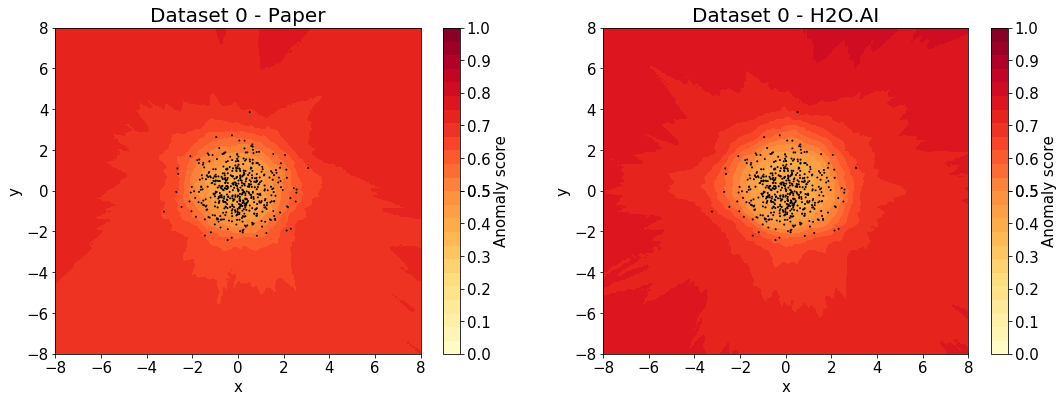

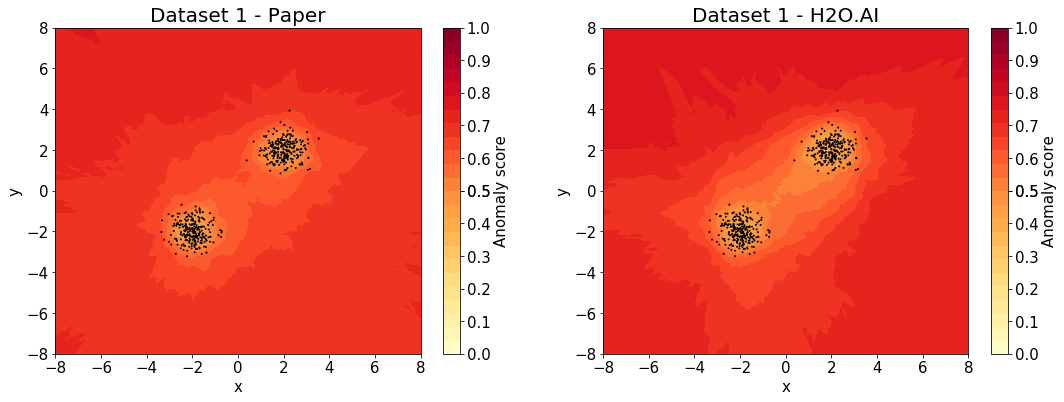

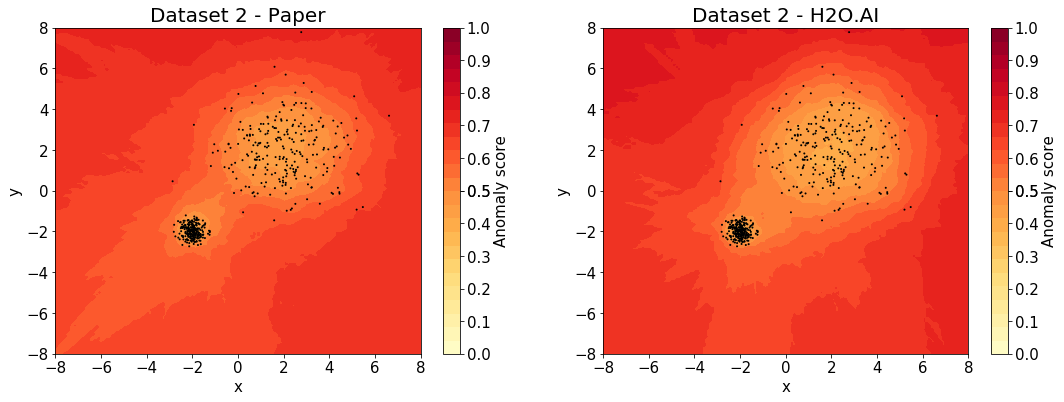

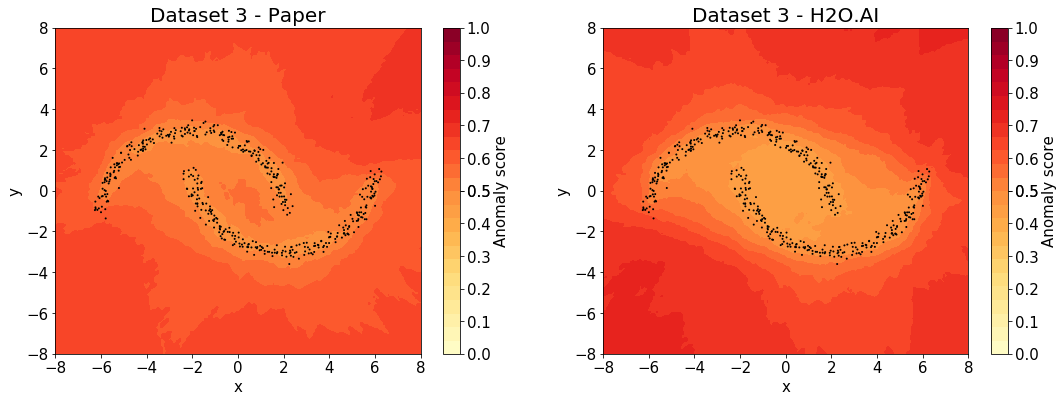

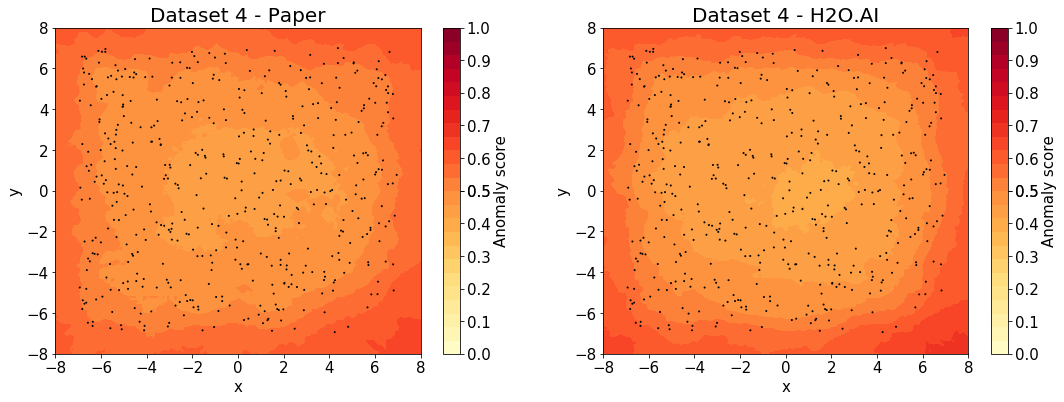

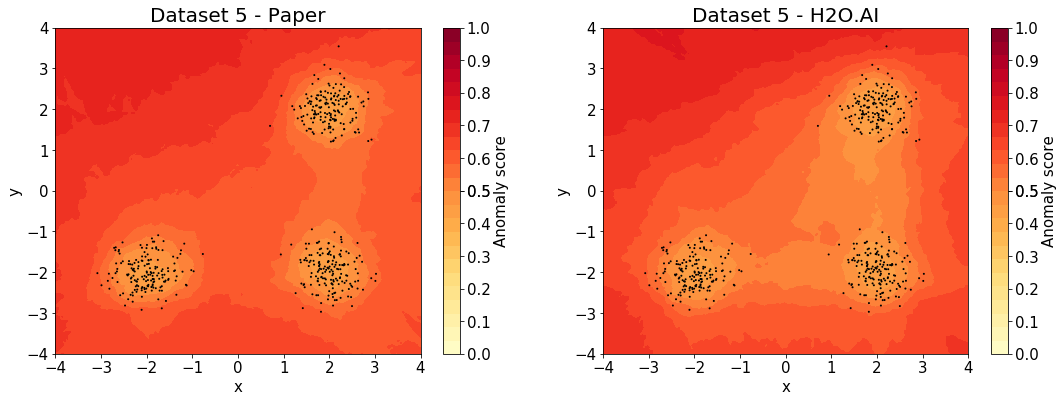

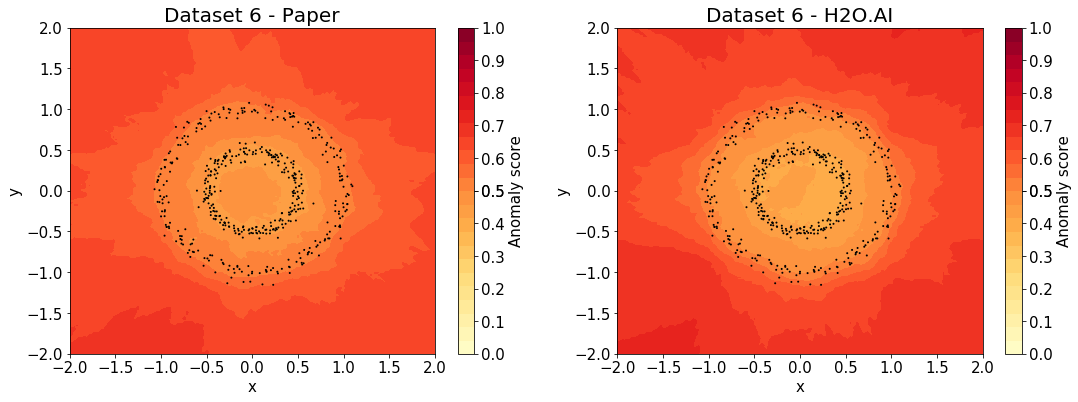

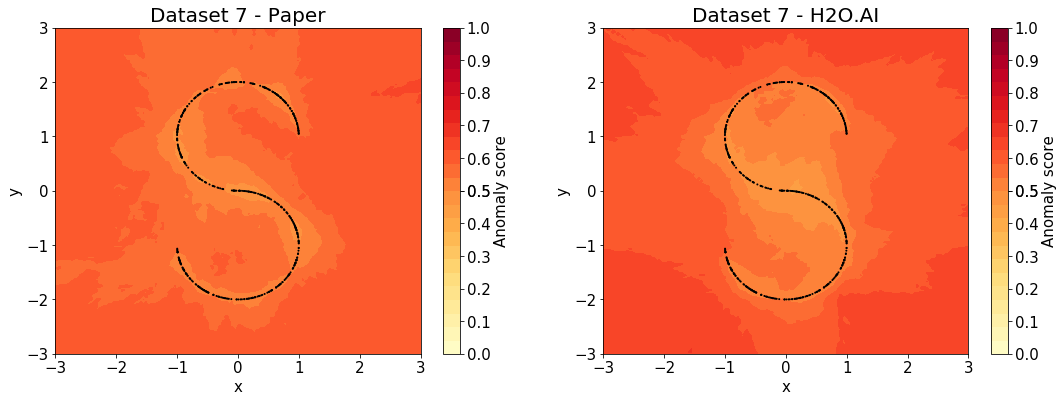

In [24]:
def plot_heatmap(dataset, heatmap_data, heat_map, plot_num, title): 

    ax1 = f.add_subplot(1, 2, plot_num)
    levels = np.linspace(0,1,25, endpoint=True)
    v = np.linspace(0, 1, 12, endpoint=True)
    v = np.around(v, decimals=1)
    CS = ax1.contourf(heatmap[2], heatmap[3], heatmap_data, levels, cmap=plt.cm.YlOrRd)
    cbar = plt.colorbar(CS, ticks=v)
    cbar.ax.set_ylabel('Anomaly score', fontsize = 15)
    cbar.ax.tick_params(labelsize=15)
    ax1.set_xlabel("x", fontsize = 15)
    ax1.set_ylabel("y", fontsize = 15)
    plt.scatter(dataset[:,0],dataset[:,1],s=1,c='None',edgecolor='k')
    plt.tick_params(labelsize=15)
    plt.title(title,  fontsize=20)

plot_num = 0;
for pred, pred2, dataset, heatmap in zip(paper_preds, h2o_preds, datasets, heatmaps):
    f = plt.figure(figsize=(18,6))
    plot_heatmap(dataset, pred[1], heatmap, 1, f"Dataset {plot_num} - Paper")
    plot_heatmap(dataset, pred2[1], heatmap, 2, f"Dataset {plot_num} - H2O.AI")
    plt.show()
    plot_num += 1


In [25]:
mtries = 10

h2o_means = []
h2o_vars = []
model_num = 0
for h2o_frame, heatmap in zip(h2o_frames, heatmaps):
    means_loc = []
    variances_loc = []
    for i in range(mtries):
        EIF_h2o = H2OExtendedIsolationForestEstimator(model_id = f"extended_isolation_forest{model_num}{i}.hex",
                                         ntrees = ntrees, seed = seed + i*100,
                                                      sample_size = sample_size, extension_level = extension_level)        
        EIF_h2o.train(training_frame = h2o_frame)
        h2o_anomaly_score_eif = EIF_h2o.predict(heatmap[0]).cbind(hf_heatmap)
        h2o_anomaly_score_df_eif = h2o_anomaly_score_eif.as_data_frame(use_pandas=True, header=True)
        means_loc.append(h2o_anomaly_score_df_eif["anomaly_score"].mean())
        variances_loc.append(h2o_anomaly_score_df_eif["anomaly_score"].var())
    h2o_means.append(np.mean(means_loc))
    h2o_vars.append(np.mean(variances_loc))
    model_num += 1

extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Mode

extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest prediction progress: |████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
extendedisolationforest pred

In [26]:
paper_means = []
paper_vars = []
for i_pred, pred in enumerate(paper_preds):
    paper_means.append(pred[0].mean())
    paper_vars.append(pred[0].var())

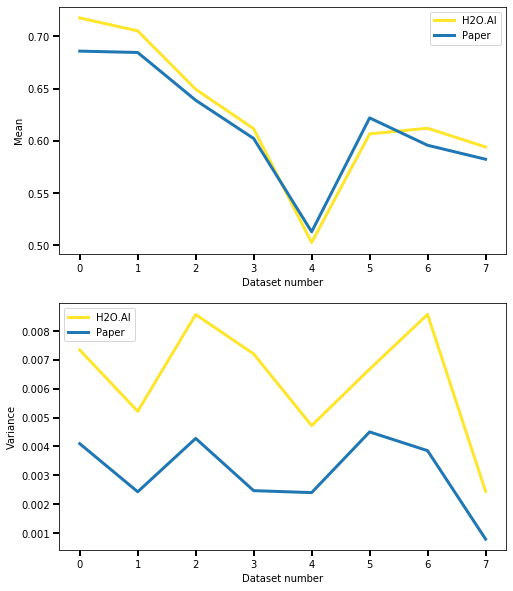

In [27]:
fig=plt.figure(figsize=(8,10))
fig.add_subplot(211)
plt.plot(h2o_means,'-', label="H2O.AI", color="#ffe52b", linewidth=3)
plt.plot(paper_means,'-', label="Paper", linewidth=3)
# plt.grid("off")
plt.xlabel("Dataset number")
plt.ylabel("Mean")
plt.legend()
plt.tick_params(direction='out', length=6, width=2)
fig.add_subplot(212)
plt.plot(h2o_vars,'-', label="H2O.AI", color="#ffe52b", linewidth=3)
plt.plot(paper_vars,'-', label="Paper", linewidth=3)
# plt.grid("off")
plt.xlabel("Dataset number")
plt.ylabel("Variance")
plt.tick_params(direction='out', length=6, width=2)
plt.legend()
plt.show()

# Acronyms

* IF = Isolation Forest
* EIF = Extended Isolation Forest
* Ex0 = extension_level parameter = 0. It means that Extended Isolation Forest behave like Isolation Forest.
* Ex1 = extension_level parameter = 1

# Bibliography

* [1] sahandha /eif: https://github.com/sahandha/eif
* [2] S. Hariri, M. Carrasco Kind and R. J. Brunner, "Extended Isolation Forest," in IEEE Transactions on Knowledge and Data Engineering, doi: 10.1109/TKDE.2019.2947676. Available from:http://dx.doi.org/10.1109/TKDE.2019.2947676